In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df=pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total']=df['TV']+df['newspaper']+df['radio']
df.head()

,TV,radio,newspaper,sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total', ylabel='sales'>

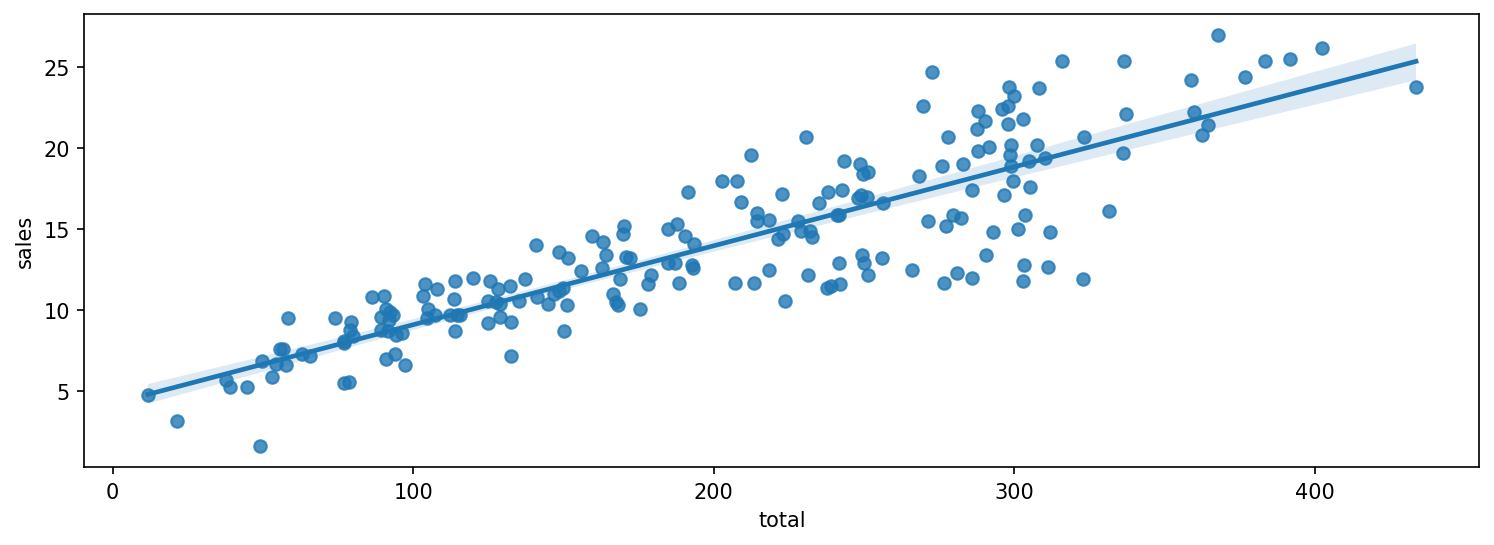

In [6]:
plt.figure(figsize=(12,4),dpi=150)
sns.regplot(x='total',y='sales',data=df)

In [7]:
X=df['total']
y=df['sales']

In [8]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend=np.linspace(0,500,100)
potential_sales=0.04868788*potential_spend + 4.24302822

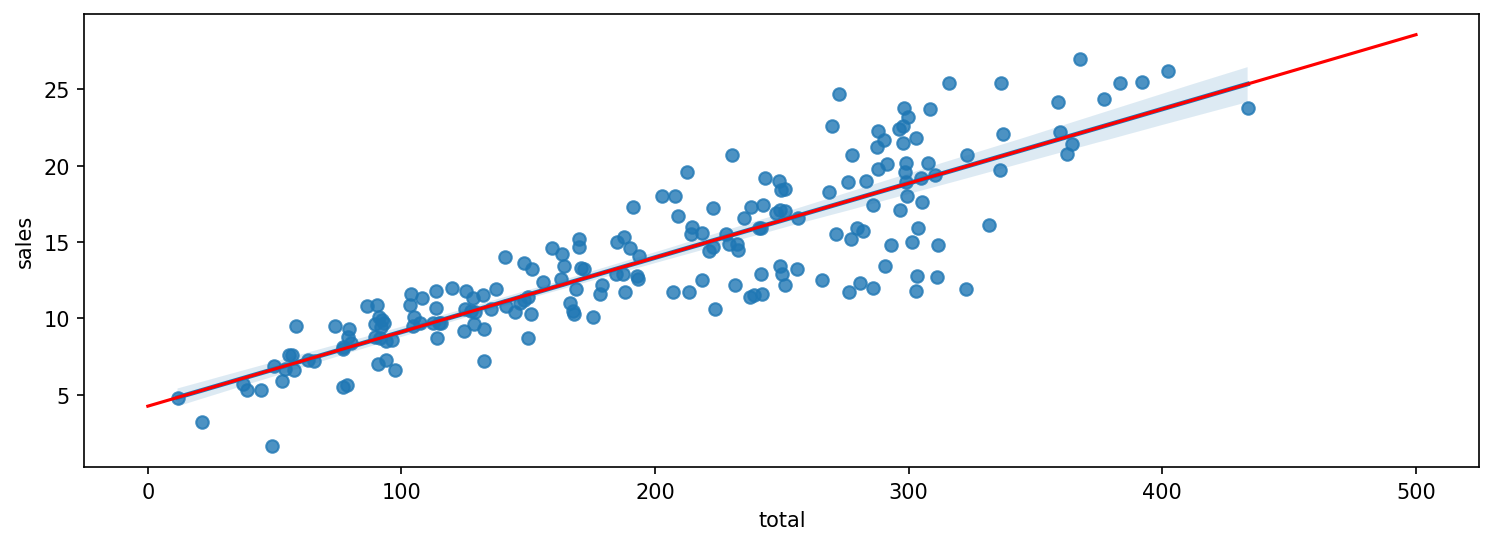

In [10]:
plt.figure(figsize=(12,4),dpi=150)
sns.regplot(x='total',y='sales',data=df)

plt.plot(potential_spend,potential_sales,color='red')

In [11]:
np.polyfit(X,y,3)
potential_spend = np.linspace(0,500,100)
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00


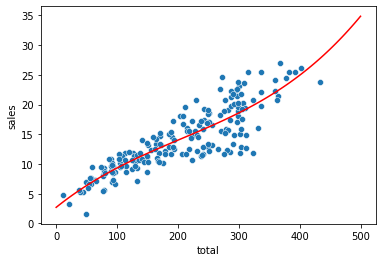

In [12]:
sns.scatterplot(x='total',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

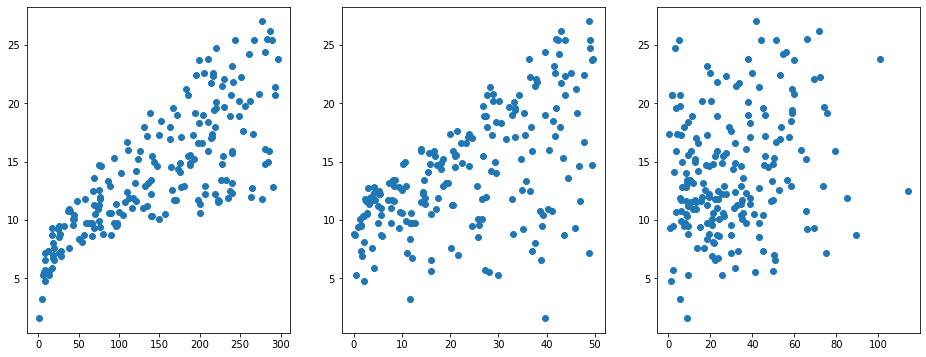

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[1].plot(df['radio'],df['sales'],'o')
axes[2].plot(df['newspaper'],df['sales'],'o')

In [14]:
X=df.drop(['sales','total'],axis=1)

In [15]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
y=df['sales']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# help(train_test_split)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit(X_train)

In [20]:
len(df)

200

In [21]:
len(X_train)


140

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [24]:
model=LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_predictions=model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
df['sales'].mean()

14.0225

In [29]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144805

In [30]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993877

In [31]:
residual=y_test-test_predictions

In [32]:
final_model=LinearRegression()

In [33]:
final_model.fit(X,y)

LinearRegression()

In [34]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [35]:
from joblib import load,dump

In [36]:
dump(final_model,'final_model.joblib')

['final_model.joblib']

In [37]:
loaded=load('final_model.joblib')